In [10]:
import pandas 
import seaborn as sns

In [3]:
data = pandas.read_csv("olympics.csv", sep="\t")
data

,City,Year,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Country,Int Olympic Committee code
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,Hungary,HUN
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver,Austria,AUT
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze,Greece,GRE
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold,Greece,GRE
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver,Greece,GRE
...,...,...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver,Germany,GER
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze,Lithuania,LTU
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze,Armenia,ARM
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold,Cuba,CUB


In [4]:
data.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal', 'Country',
       'Int Olympic Committee code'],
      dtype='object')

## Barres verticales

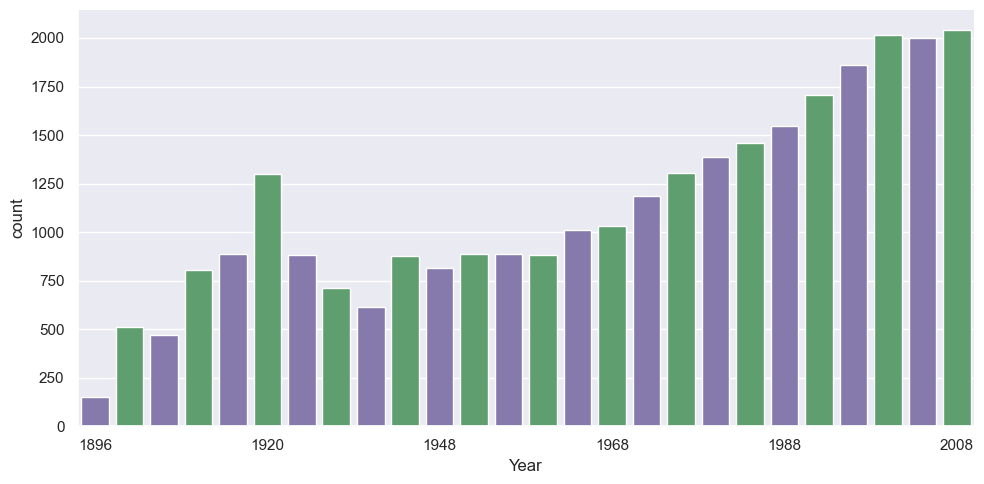

In [17]:
sns.set()
g = seaborn.catplot(x = "Year", data=data, aspect=2,
                       kind="count", palette=["m", "g"])
g.set_xticklabels(step=5)

## Barres horizontales

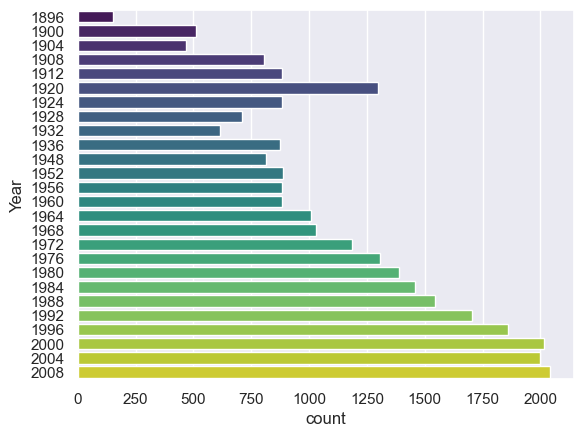

In [14]:
g = seaborn.countplot(y = "Year", data=data,  palette="viridis")

## Points

<Axes: xlabel='Year', ylabel='Discipline'>

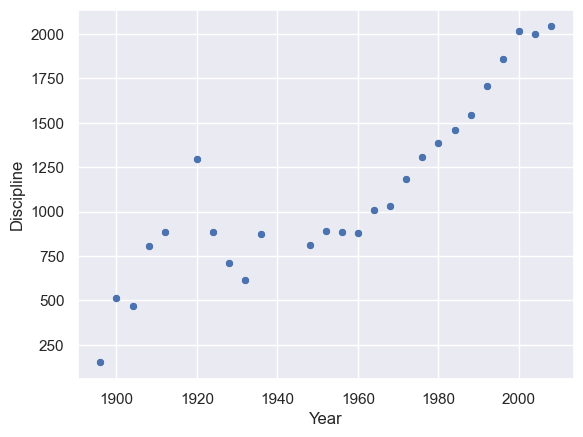

In [19]:
p = (data
     .groupby(['Year']).count()
    )
p['Discipline']

seaborn.scatterplot(x = p.index,y = p['Discipline'] )

## Barres multiples verticales

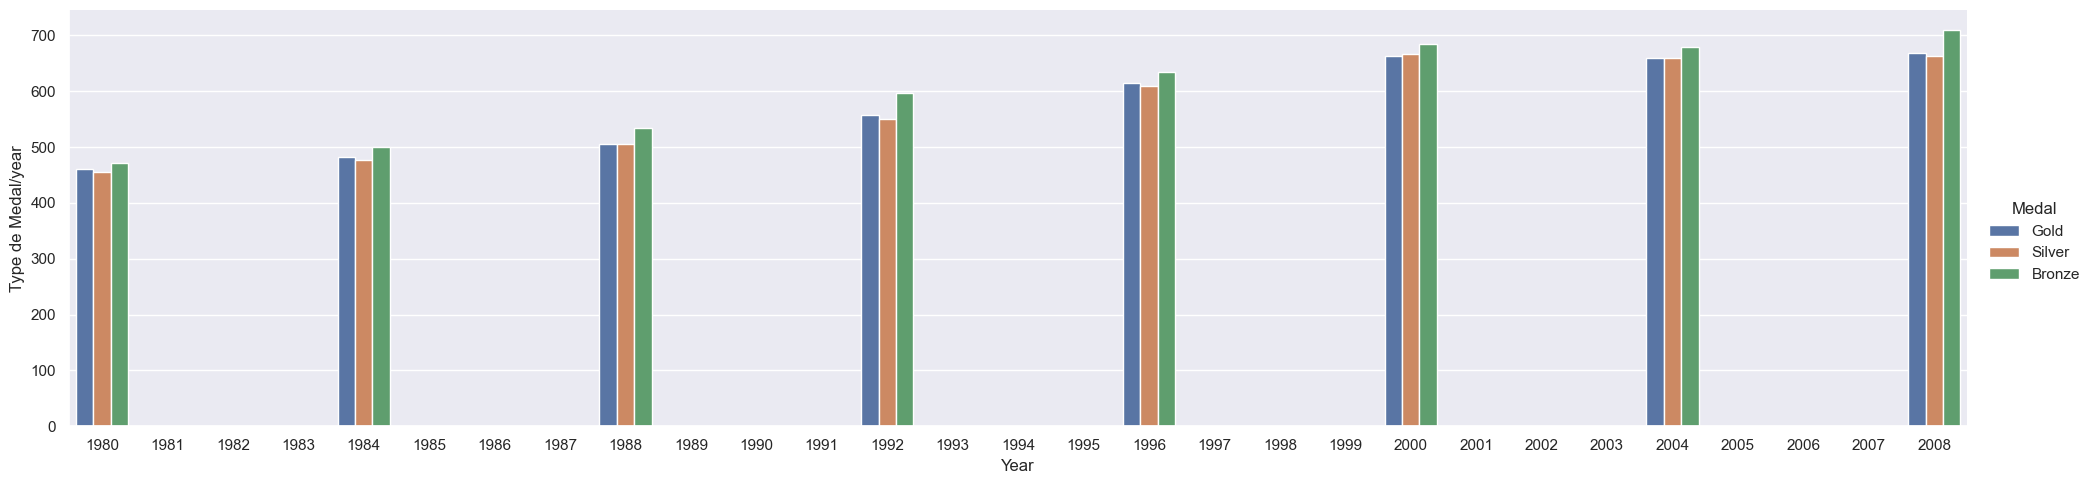

In [34]:
g = seaborn.catplot(x = "Year", data=data, aspect=4, kind='count',
                       hue='Medal', order=range(1980, 2009))
g.set_ylabels('Type de Medal/year')

In [31]:
data.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal', 'Country',
       'Int Olympic Committee code'],
      dtype='object')

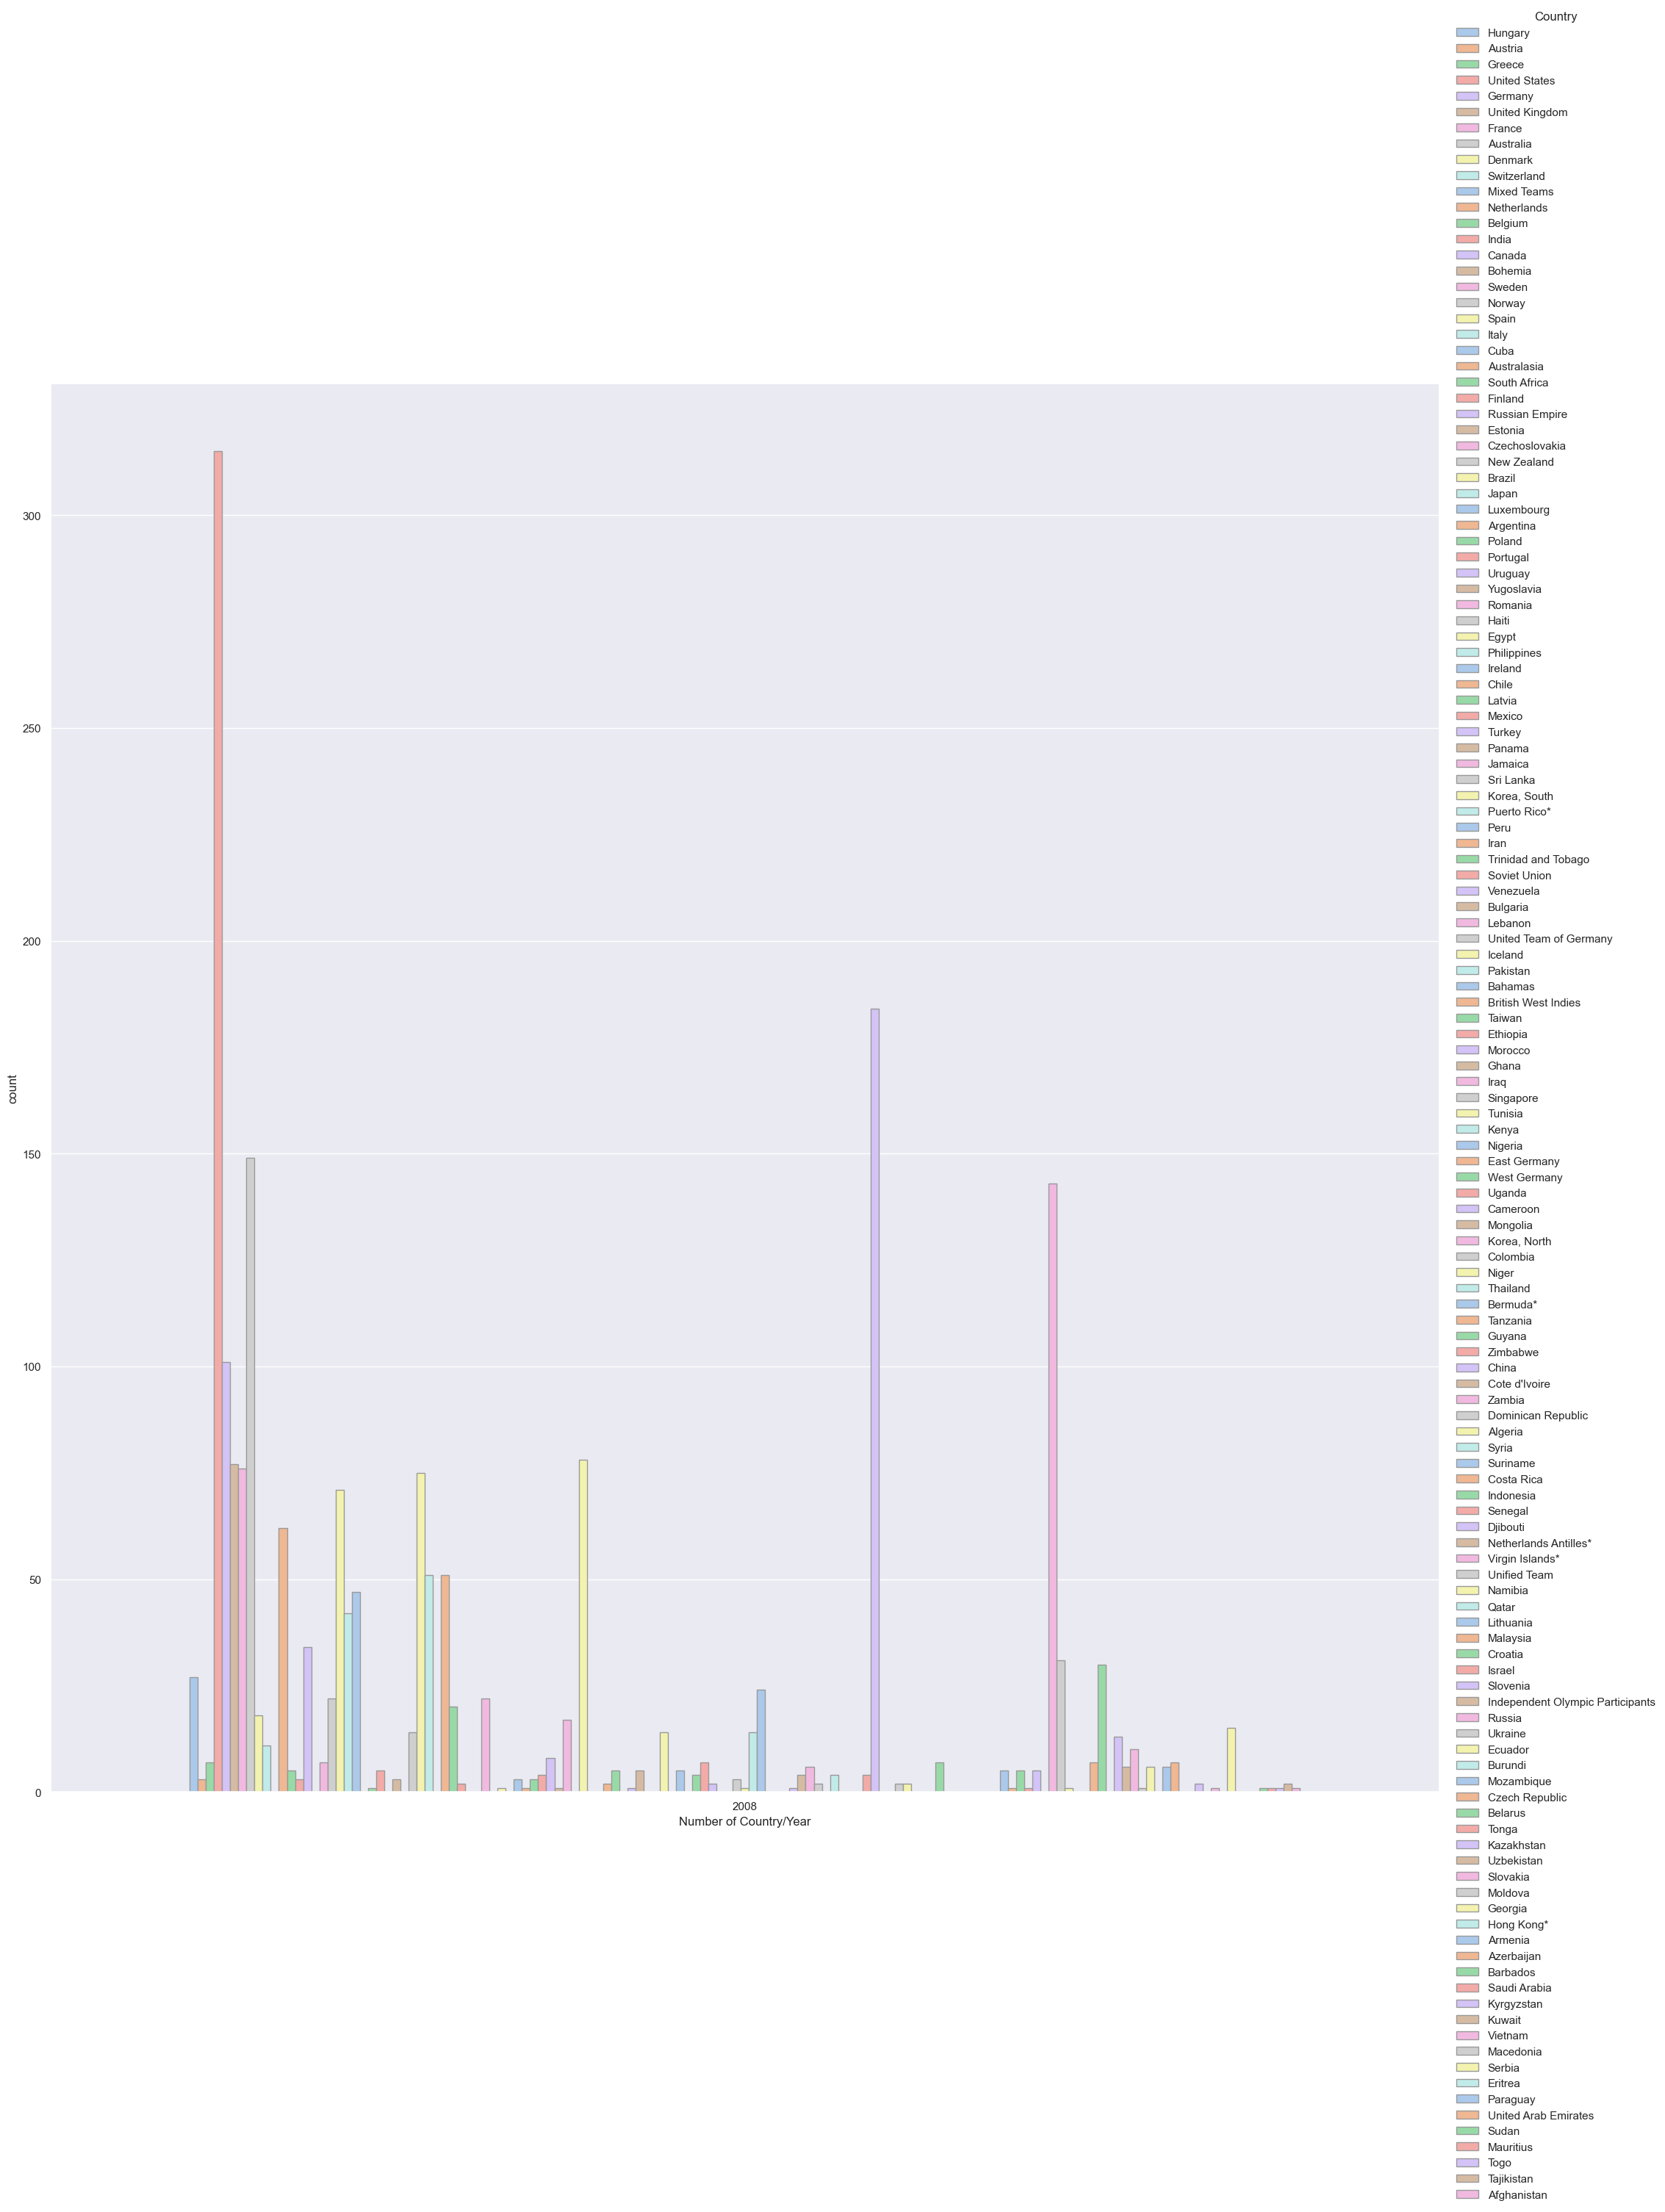

In [39]:
g = seaborn.catplot(x = "Year", hue="Country", kind="count",
            palette="pastel", edgecolor=".6", height =20,
            data=data, order=range(2008, 2009));
g.set_xlabels('Number of Country/Year')

## Barres multiples horizontales

In [40]:
data.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal', 'Country',
       'Int Olympic Committee code'],
      dtype='object')

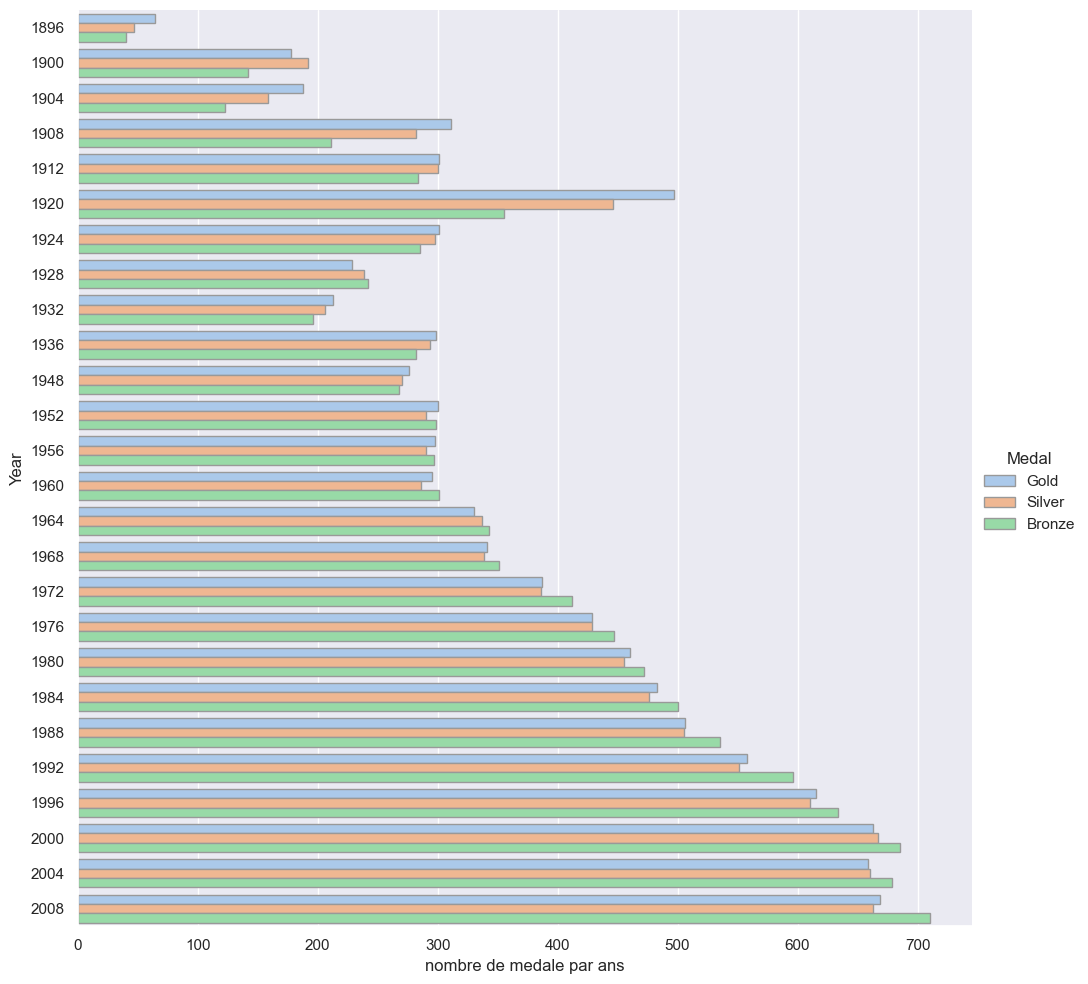

In [42]:
g = seaborn.catplot(y="Year", hue="Medal", kind="count",
            palette="pastel", edgecolor=".6",height =10,
            data=data);
g.set_xlabels('nombre de medale par ans')

<Axes: ylabel='Year'>

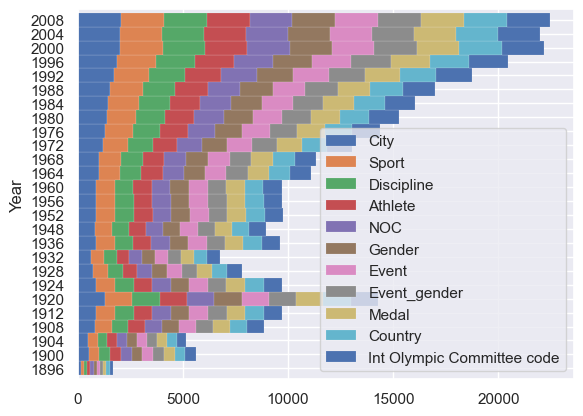

In [43]:
p = (data
     .groupby(['Year']).count()
    )
p.plot(kind='barh', stacked=True, width=1, lw=0.1)

<Axes: xlabel='Year'>

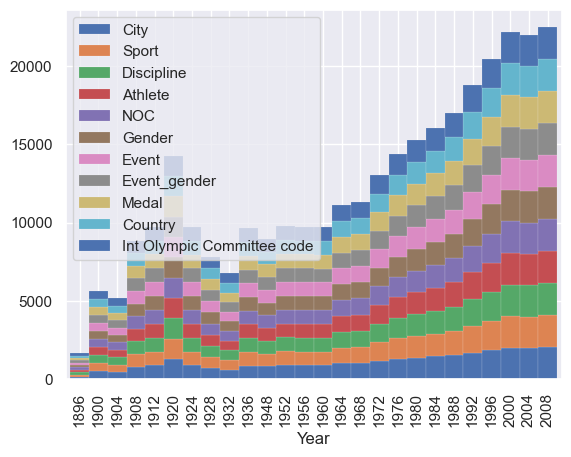

In [44]:
p.plot(kind='bar', stacked=True, width=1, lw=0.1)

## Cartes de chaleur

<Axes: ylabel='Year'>

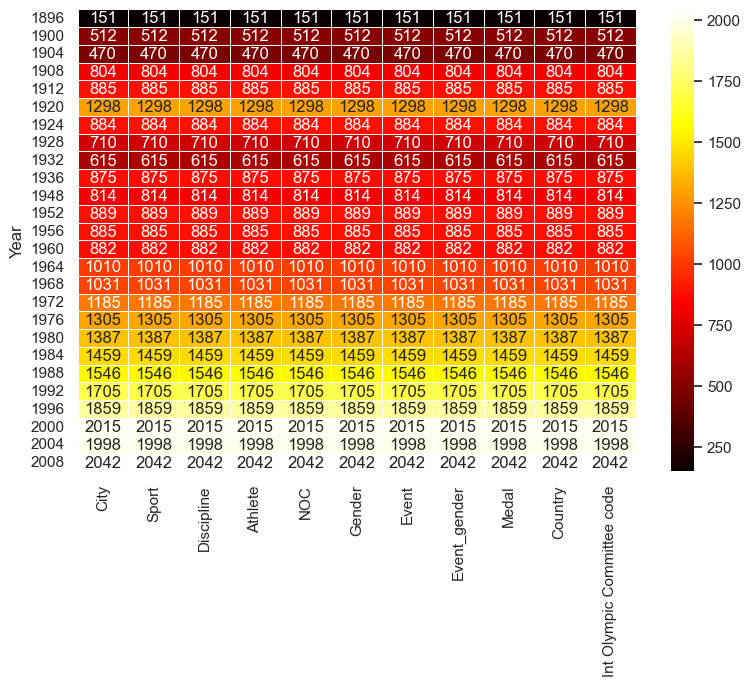

In [46]:
import matplotlib
p = (data
     .groupby(['Year']).count()
    )
p
f, ax = matplotlib.pyplot.subplots(figsize=(9, 6))
seaborn.heatmap(p, annot=True, fmt="d", cmap= 'hot', linewidths=.5, ax=ax)

## Bubble chart

In [47]:
data.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal', 'Country',
       'Int Olympic Committee code'],
      dtype='object')

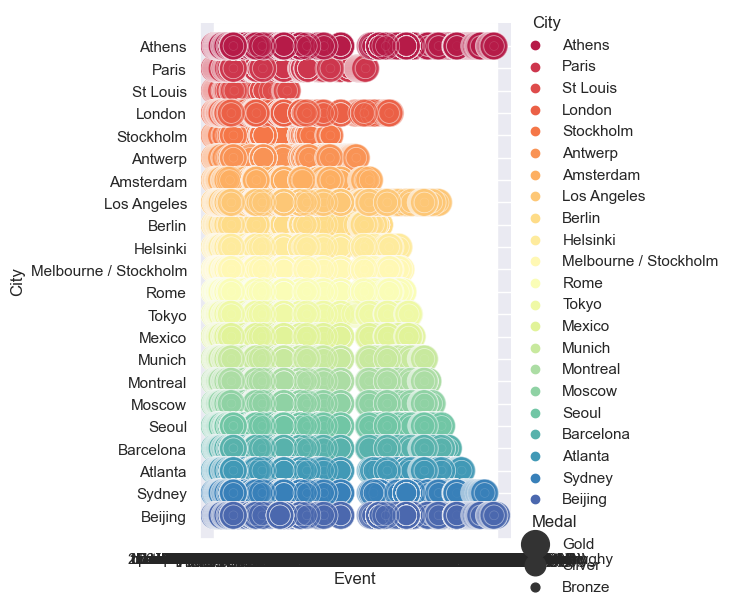

In [52]:
seaborn.set()
g = seaborn.relplot(
    x="Event", 
    y="City", 
    hue="City", 
    size="Medal",
    sizes=(40, 400), 
    alpha=.5, 
    palette="Spectral",
    height=6, 
    data=data)
g.set_axis_labels("Event", "City");

## Multiples plots sur une même figure

<Axes: xlabel='Year', ylabel='City'>

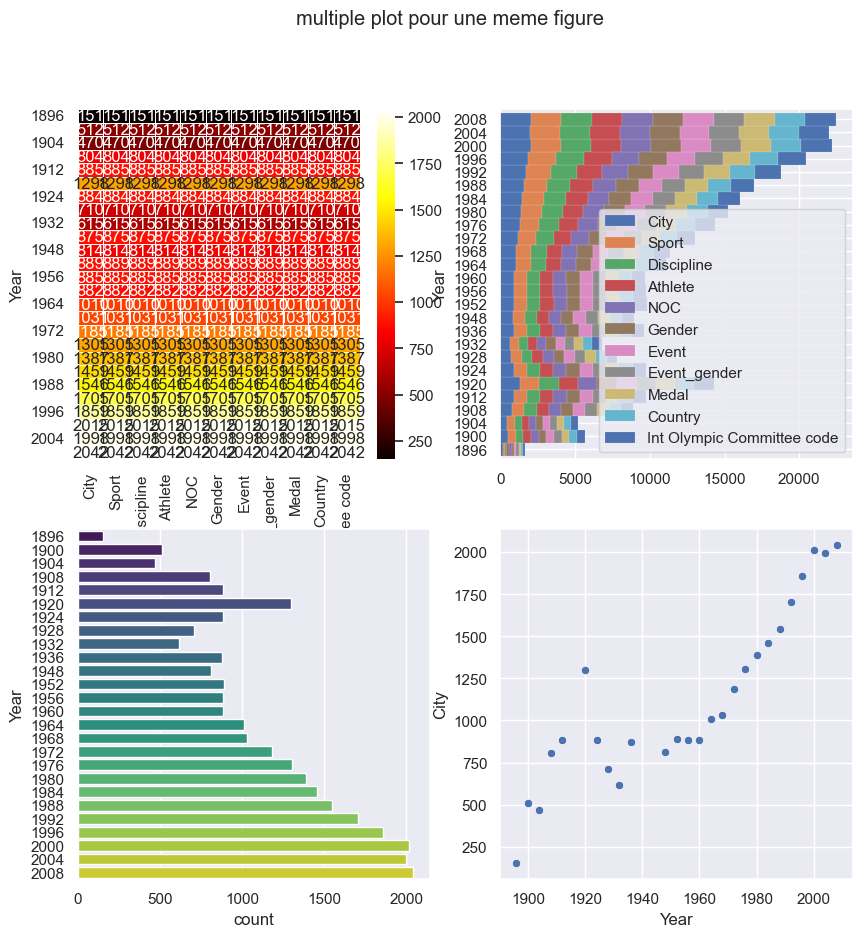

In [56]:
fig = matplotlib.pyplot.figure(figsize=(10,10))
fig.suptitle("multiple plot pour une meme figure ")
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
seaborn.heatmap(p, annot=True, fmt="d", cmap= 'hot', linewidths=.5, ax=ax1)
p.plot(kind='barh', stacked=True, width=1, lw=0.1, ax=ax2)
seaborn.countplot(y = "Year", data=data,  palette="viridis",ax=ax3)
seaborn.scatterplot(x= p.index,y = p['City'], ax= ax4)

## Modification de la taille des figures, des fonts, des titres

C:\Users\sanar\AppData\Local\Temp\ipykernel_17252\4021575436.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = seaborn.lineplot(


Text(0, 0.5, 'Year')

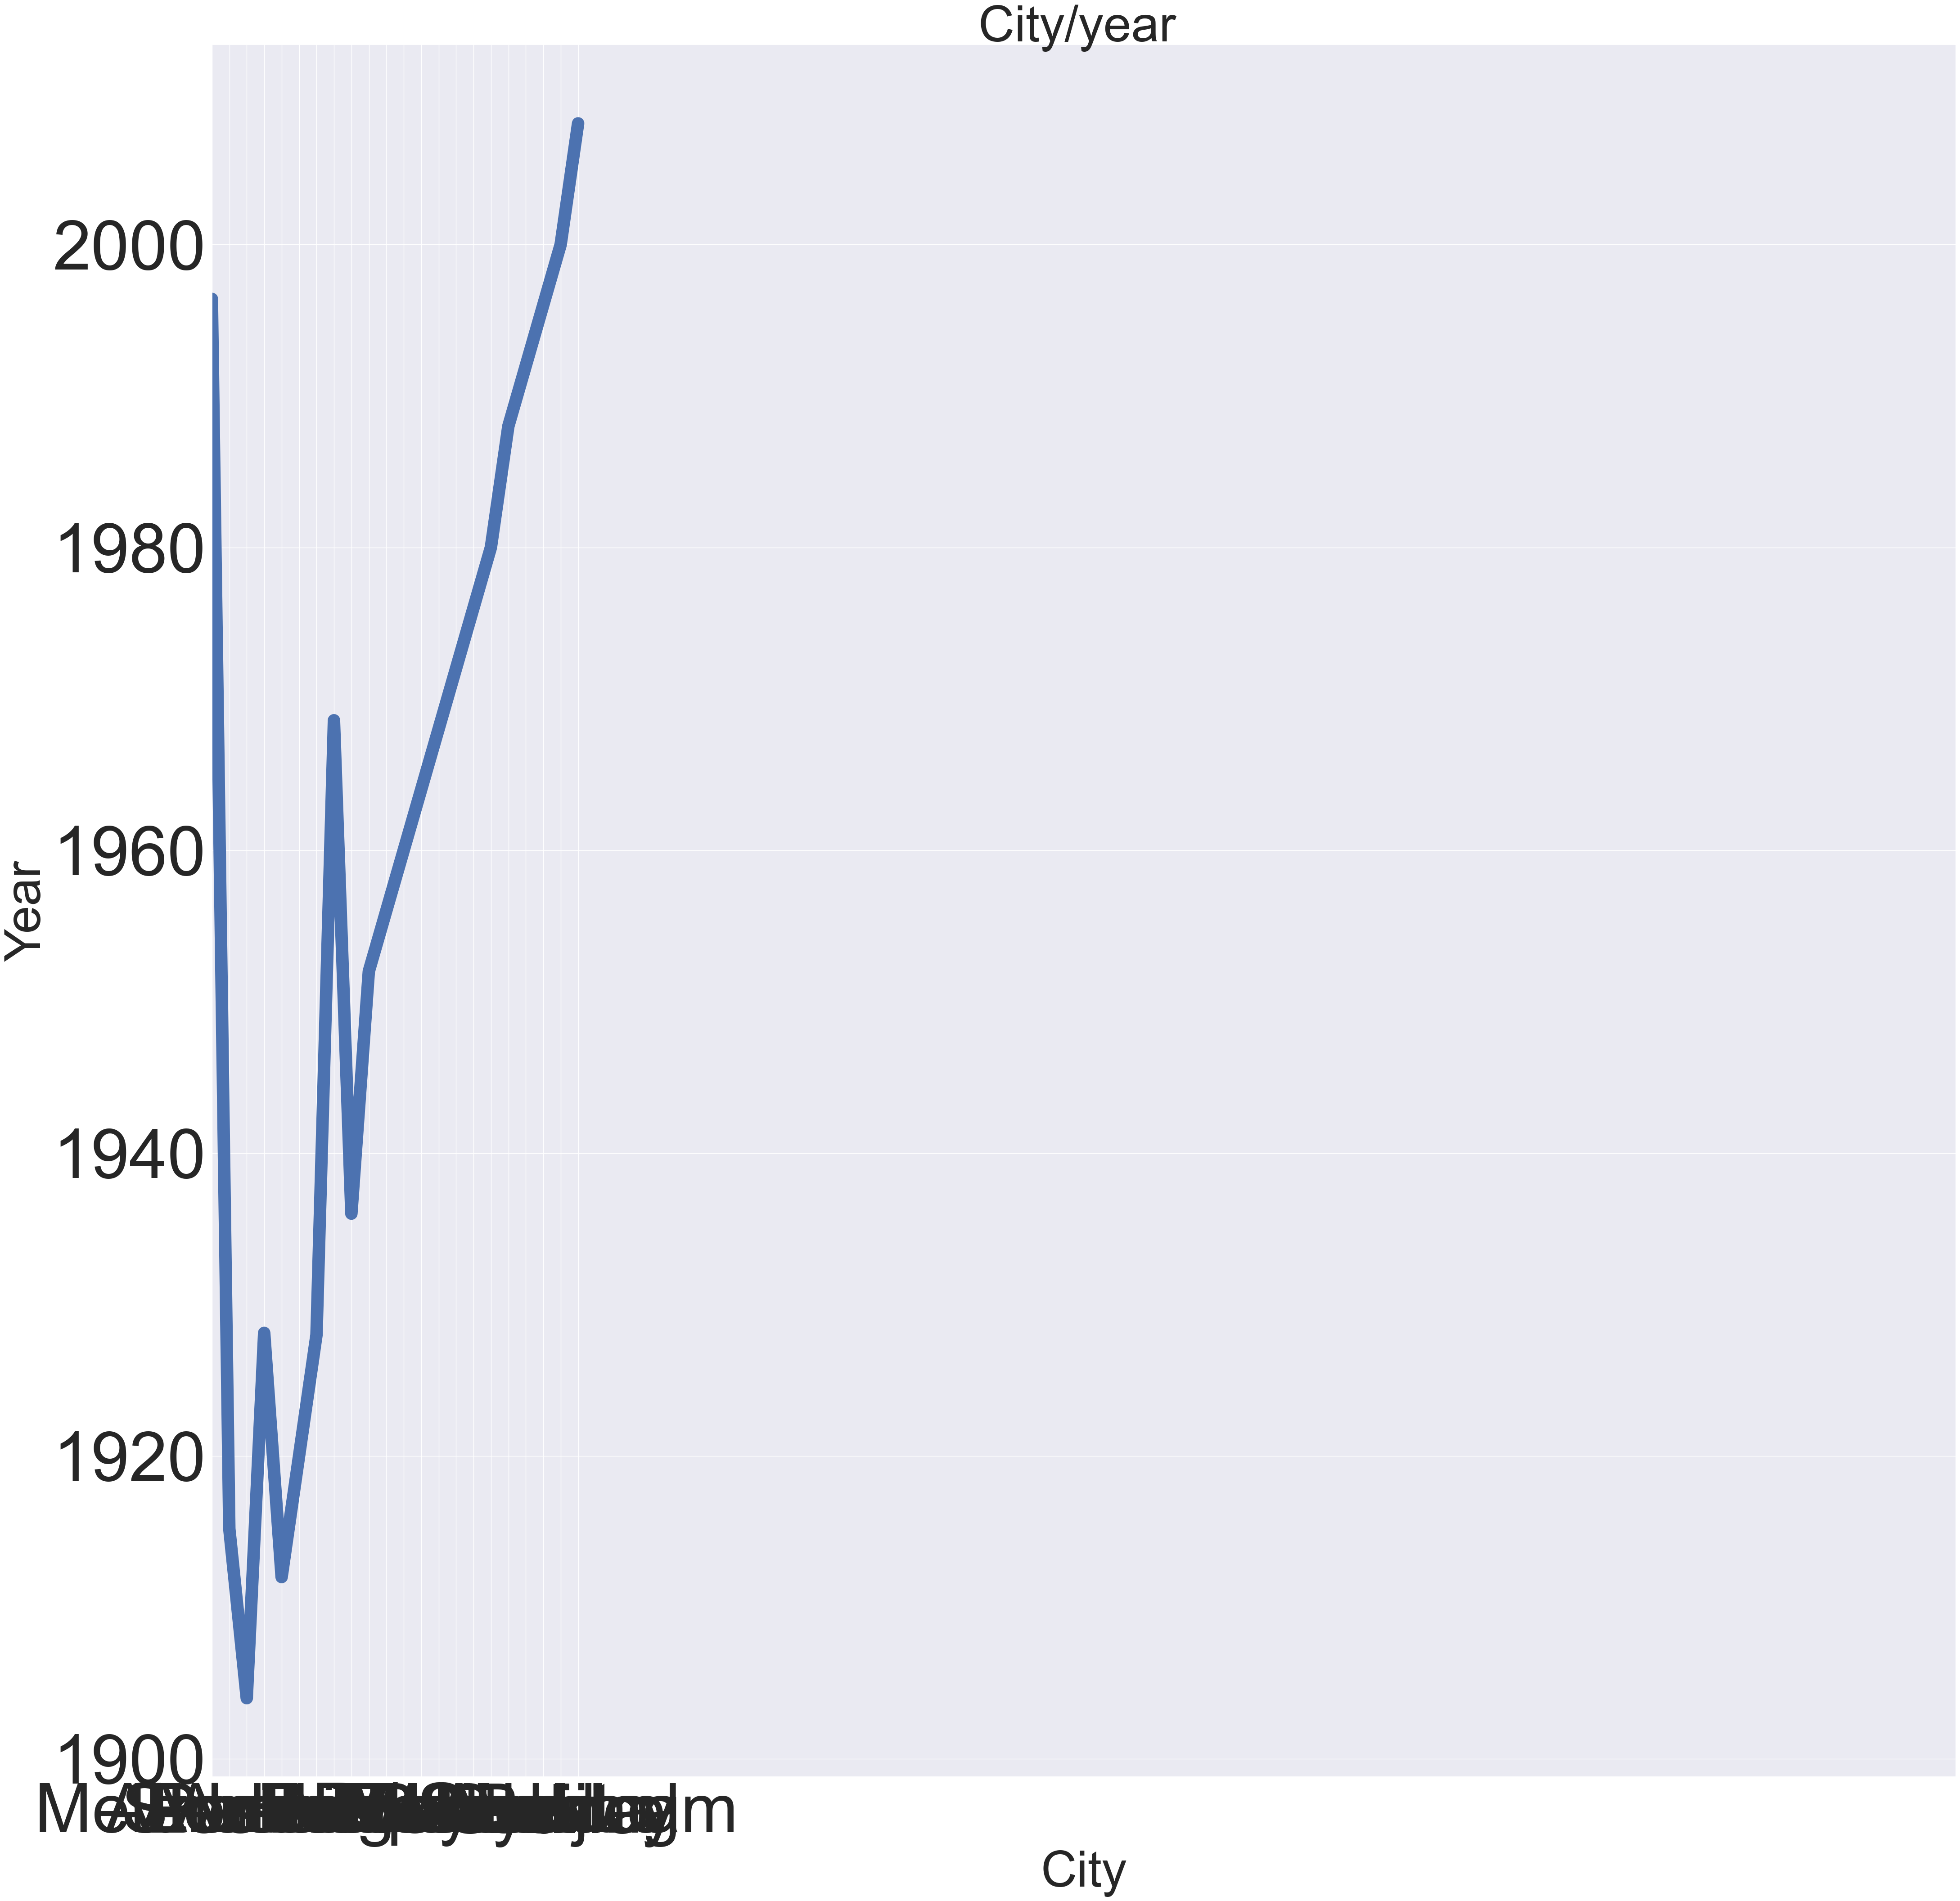

In [62]:
fig = matplotlib.pyplot.figure(figsize=(50,50))
seaborn.set(font_scale=10)
ax = seaborn.lineplot(
    x="City",
    y="Year",
    ci = None,#sans barres d'erreur,
    color='b',
    markers=True,
    linewidth = 20,
    data=data)
ax.set(xlim=(0,100))
ax.set_title("City/year ",fontsize = 80)
ax.set_xlabel("City", fontsize = 80)
ax.set_ylabel("Year", fontsize = 80)


## Sauvegarder la figure


In [ ]:
g = seaborn.lmplot(
    x="horsepower", 
    y="mpg", 
    hue="origin",height=7, aspect=1.6,
    data=mpg);
matplotlib.pyplot.savefig('image.png',dpi= 'figure'); 